# Workshop 3: importing data

Part of this tutorial is based on the user guides of pandas (https://pandas.pydata.org/docs/user_guide/index.html), netcdf4 (https://unidata.github.io/netcdf4-python/) and xarray (http://xarray.pydata.org/en/stable/user-guide/index.html). Also, part of this tutorial is based on the Python introduction from last year of André Jüling, created under the BSD 3-Clause License (https://github.com/AJueling/python_climate_physics).

There are many different types of datafiles and there are a lot of Python tools available to deal with these data. Datacamp has provided a [cheatsheet](http://datacamp-community-prod.s3.amazonaws.com/72e88aa1-b4f2-4658-9d86-15becf8263df) with a nice overview of what package to use for what types of data. Most of the time, you will able to use the tools in NumPy, especially if you have .txt or .csv files. But in this tutorial, we will introduce you to new libraries that are really useful: [pandas](https://pandas.pydata.org/docs/user_guide/index.html), [NetCDF4](https://unidata.github.io/netcdf4-python/) and [xarray](http://xarray.pydata.org/en/stable/user-guide/index.html). 

- __Pandas__ = library for importing, processing and analysing tabular data, such as spreadsheets.
- __NetCDF4__ =  lower level interface for working with netCDF and OpenDAP datasets, you can read and modify files on-disk.
- __xarray__ = for multidimensional data processing. It builds on NetCDF4 and NumPy and has a lot of useful tools for dataprocessing. It is similar to Pandas, but then for NetCDF files.

All of these libraries are open-source. You probably have noticed that this tutorial is leaning heavily towards NetCDF files. This was on purpose, as during the master, you will often come across these type of files as this is a very efficient way to store large datasets/model outputs!

# a) Pandas

The first part of the tutorial will focus on working with Pandas, the second part on NetCDF4 and xarray. First, let's import the package

`import pandas as pd`

You can check wether pandas is alreay installed on your pc with the command

`conda list`

This gives an overview of all the packages that are installed. If you don't have pandas yet, install it with

`conda install pandas` or `pip install pandas` 

You can do this directly in the Notebook or in the terminal.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A __Series__ represents a one-dimensional, labelled array of data. This array can hold any type of data (integers, strings, floats, Python objects, ...). The label is called an __index__, this the main difference between a Series and NumPy array. We can access the data through this index.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.


In [2]:
names = ['Alice', 'Bob', 'Claire']
values = [30, 15, 22]
ages = pd.Series(values, index=names)
ages

Alice     30
Bob       15
Claire    22
dtype: int64

So here, the names are the __index__. We can access the underlying index object if we need to:

In [3]:
ages.index

Index(['Alice', 'Bob', 'Claire'], dtype='object')

Arithmetic operations and most NumPy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(ages) / ages**2

Alice     0.003779
Bob       0.012036
Claire    0.006386
dtype: float64

Series have built in plotting methods, such as line plots, bar plots, histograms and many more (see https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). In order to access these options, you need to import matplotlib (which we already did).

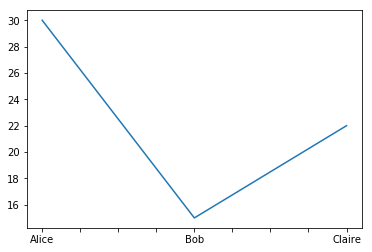

In [5]:
ages.plot()

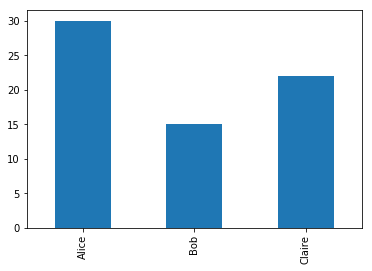

In [6]:
ages.plot(kind='bar')

### Indexing

We can get values back out using the index via the `.loc` attribute. Or by raw position using `.iloc`, raw positioning is the numbered, zero-based indexing that we have seen before).

In [7]:
print(ages.loc['Alice'])
print(ages.iloc[0])
print(ages.loc['Claire'])
print(ages.iloc[2])

30
30
22
22


If we need to, we can always get the raw data back out as well

In [8]:
ages.values # a numpy array

array([30, 15, 22])

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the __DataFrame__, which is a 2D data structure.  A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet. A DataFrame can handle all sorts of data, such as n-dimensional ndarrays, lists and Series. Along with the data, you can again optionally pass __index__ (row labels) and __columns__ (column labels) arguments. 

Below we create a DataFrame.

In [9]:
# first we create a dictionary
data = {'age': [30, 15, 22],
        'height': [180, 155, 160],
        'weight': [70, 52, np.nan]}
df = pd.DataFrame(data, index=['Alice', 'Bob', 'Claire'])
df

,age,height,weight
Alice,30,180,70.0
Bob,15,155,52.0
Claire,22,160,NaN


You can easily get information about a DataFrame with the command `pd.info()`. This tells you the size of the DataFrame, the type of data is in there and how much memory it uses.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Alice to Claire
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3 non-null      int64  
 1   height  3 non-null      int64  
 2   weight  2 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


In the table above, you see `NaN`. This means 'not a number' and represents missing data. When dealing with real data, often you have to deal with this. Pandas handles missing data very elegantly, keeping track of it through all calculations. To easily locate missing data, you can use the commands `pd.isna()` and `pd.notna()`. 

In [11]:
pd.isna(df['weight'])

Alice     False
Bob       False
Claire     True
Name: weight, dtype: bool

In [12]:
pd.notna(df['weight'])

Alice      True
Bob        True
Claire    False
Name: weight, dtype: bool

You see that these commands give a Boolean result which tell you where the `NaN`s are.

A wide range of statistical functions are available on both Series and DataFrames. You will see that if you don't specify over what index/column you want to apply this function, these functions return the output per index. You can also see that these functions still work even though we have missing data. We show some examples below:

In [13]:
df.index

Index(['Alice', 'Bob', 'Claire'], dtype='object')

In [14]:
df.min() # minimum value

age        15.0
height    155.0
weight     52.0
dtype: float64

In [15]:
df.mean() # average

age        22.333333
height    165.000000
weight     61.000000
dtype: float64

In [16]:
df.std() # standard deviation

age        7.505553
height    13.228757
weight    12.727922
dtype: float64

A very useful command is `describe`, this provides an overview of some basic statics of a DataFrame.

In [17]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.000000
mean,22.333333,165.000000,61.000000
std,7.505553,13.228757,12.727922
min,15.000000,155.000000,52.000000
25%,18.500000,157.500000,56.500000
50%,22.000000,160.000000,61.000000
75%,26.000000,170.000000,65.500000
max,30.000000,180.000000,70.000000


In [18]:
df.index

Index(['Alice', 'Bob', 'Claire'], dtype='object')

## Indexing

Indexing for DataFrames is very similar to Series (`loc` and `iloc`). We can also get a single column as a Series using Python's getitem syntax on the DataFrame object or by using the attribute syntax (examples given below). Note that we are now dealing with 2D data, so if you want to get one singular entry, you need to specify both the row and the column.

In [19]:
df['height'] # getitem syntax

Alice     180
Bob       155
Claire    160
Name: height, dtype: int64

In [20]:
df.height # attribute syntax

Alice     180
Bob       155
Claire    160
Name: height, dtype: int64

In [21]:
df.loc['Bob']

age        15.0
height    155.0
weight     52.0
Name: Bob, dtype: float64

In [22]:
df.iloc[2]

age        22.0
height    160.0
weight      NaN
Name: Claire, dtype: float64

In [23]:
df.loc['Claire', 'age'] # to get one entry, specify the index(=row) and the column

22

In [24]:
df.iloc[:2, 0] # or with 'normal' zero-based indexing

Alice    30
Bob      15
Name: age, dtype: int64

## Calculations

We can make a calculation using columns from the DataFrame, it will keep the same index. We can easily add  these as another column to the DataFrame. 

In [25]:
df['BMI'] = df.weight / (df.height/100)**2
df

,age,height,weight,BMI
Alice,30,180,70.0,21.604938
Bob,15,155,52.0,21.644121
Claire,22,160,NaN,NaN


We can also index using a Boolean series. This is very useful to extract certain portions of the DataFrame.

In [26]:
df['is_adult'] = df.age > 18
df

,age,height,weight,BMI,is_adult
Alice,30,180,70.0,21.604938,True
Bob,15,155,52.0,21.644121,False
Claire,22,160,NaN,NaN,True


## Plotting

Like we saw with Series, DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in. We will go through some examples below:

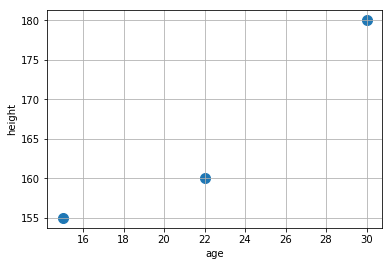

In [27]:
df.plot(kind='scatter', x='age', y='height', grid=True, s=100)

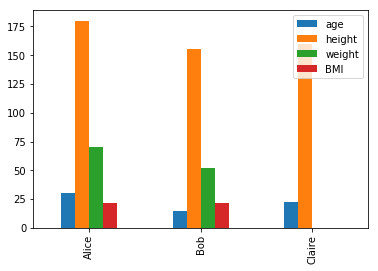

In [28]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great! In the following example, we will create a time array with the command `pd.date_range` . 

In [29]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
two_years

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=731, freq='D')

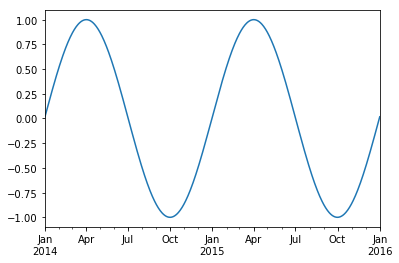

In [30]:
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We had specified the full date, but you can for example also get certain parts of these times in days with the command `timeseries.index.dayofyear`, or the month with `timeseries.index.month` or the day in the month with `timeseries.index.day`.

In [31]:
print(timeseries.index.dayofyear,timeseries.index.month,timeseries.index.day)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365,   1],
           dtype='int64', length=731) Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731) Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)


We can use python's slicing notation inside `.loc` to select a date range.

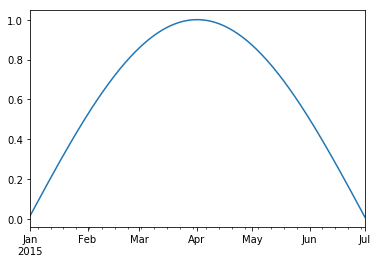

In [32]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

## Reading Data Files: Weather Station Data

In this example, we will use weather station data from the [National Center of Environmental Information from the NOAA](https://www.ncei.noaa.gov/access/search/dataset-search?observationTypes=Land%20Surface). Here, you can find a lot of data and model output freely available. The [data](https://github.com/JannekeKrabbendam93/Python-Climate-Physics-2021/blob/main/sample.csv) used here are part of the Global Summary of the Day and they are measured at the airport in Denver (USA) in 2018. The accompanying [ReadMe file](https://github.com/JannekeKrabbendam93/Python-Climate-Physics-2021/blob/main/README.txt) gives a description of the data, for example the units that the data are in. I have already downloaded the data for you and uploaded it on GitHub and Blackboard.

If you download that file, you now have a csv file on our hard drive called `sample.csv`. Examine it.

To read it into Pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

Before you load this file into Python, make sure that either the datafile is in the same folder as your notebook, or provide the notebook with a path to the datafile. I put the file in a folder called `data`, this folder is located in the same folder as the notebook, so the path to the data is `data/sample.csv`.

With no options, this is what we get.

In [33]:
df = pd.read_csv('data/sample.csv')
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,01/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,...,9.9,999.9,28.0,,3.0,,0.0,G,999.9,1000
1,72565003017,02/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,...,9.9,999.9,43.0,,3.0,,0.0,G,999.9,0
2,72565003017,03/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,999.9,0
3,72565003017,04/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,...,8.9,999.9,53.1,,17.1,,0.0,G,999.9,0
4,72565003017,05/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,...,14.0,999.9,55.9,,23.0,,0.0,G,999.9,0


You see that Pandas immediately is able to recognise the headers and the different columns. This is because in our file, the columns are separated by a comma, like expected. If you would try to read a different text file, where the columns are separated in a different way, you can tell pandas this by using the keyword `sep`.

If we look closely, we will see there are lots of 999.9 and 99.99 values in the file. The README tells us that these are values used to represent missing data. Let's tell this to pandas.

In [34]:
df = pd.read_csv('data/sample.csv', sep=',', na_values=[9999.9, 999.9, 99.99])
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,72565003017,01/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,...,9.9,NaN,28.0,,3.0,,0.0,G,NaN,1000
1,72565003017,02/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,...,9.9,NaN,43.0,,3.0,,0.0,G,NaN,0
2,72565003017,03/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,...,15.9,24.1,53.1,,10.9,,0.0,G,NaN,0
3,72565003017,04/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,...,8.9,NaN,53.1,,17.1,,0.0,G,NaN,0
4,72565003017,05/01/2018,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,...,14.0,NaN,55.9,,23.0,,0.0,G,NaN,0


Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           365 non-null    int64  
 1   DATE              365 non-null    object 
 2   LATITUDE          365 non-null    float64
 3   LONGITUDE         365 non-null    float64
 4   ELEVATION         365 non-null    float64
 5   NAME              365 non-null    object 
 6   TEMP              365 non-null    float64
 7   TEMP_ATTRIBUTES   365 non-null    int64  
 8   DEWP              365 non-null    float64
 9   DEWP_ATTRIBUTES   365 non-null    int64  
 10  SLP               364 non-null    float64
 11  SLP_ATTRIBUTES    365 non-null    int64  
 12  STP               365 non-null    float64
 13  STP_ATTRIBUTES    365 non-null    int64  
 14  VISIB             365 non-null    float64
 15  VISIB_ATTRIBUTES  365 non-null    int64  
 16  WDSP              365 non-null    float64
 1

One problem here is that pandas did not recognize the `DATE` column as a date. Let's help it.

In [36]:
df = pd.read_csv('data/sample.csv', sep=',', na_values=[9999.9, 999.9, 99.99], parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   STATION           365 non-null    int64         
 1   DATE              365 non-null    datetime64[ns]
 2   LATITUDE          365 non-null    float64       
 3   LONGITUDE         365 non-null    float64       
 4   ELEVATION         365 non-null    float64       
 5   NAME              365 non-null    object        
 6   TEMP              365 non-null    float64       
 7   TEMP_ATTRIBUTES   365 non-null    int64         
 8   DEWP              365 non-null    float64       
 9   DEWP_ATTRIBUTES   365 non-null    int64         
 10  SLP               364 non-null    float64       
 11  SLP_ATTRIBUTES    365 non-null    int64         
 12  STP               365 non-null    float64       
 13  STP_ATTRIBUTES    365 non-null    int64         
 14  VISIB             365 non-

It worked! Finally, let's tell pandas to use the date column as the index with `set_index`. This way we can access all the values by time.

In [37]:
df = df.set_index('DATE')
df.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",11.6,24,5.5,24,1030.9,...,9.9,NaN,28.0,,3.0,,0.0,G,NaN,1000
2018-02-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",21.2,24,7.3,24,1029.4,...,9.9,NaN,43.0,,3.0,,0.0,G,NaN,0
2018-03-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.8,24,3.0,24,1026.7,...,15.9,24.1,53.1,,10.9,,0.0,G,NaN,0
2018-04-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",34.6,24,11.6,24,1022.0,...,8.9,NaN,53.1,,17.1,,0.0,G,NaN,0
2018-05-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",36.3,24,11.4,24,1020.9,...,14.0,NaN,55.9,,23.0,,0.0,G,NaN,0


For example, we can easily get all the measurements at one single day.

In [40]:
df.loc['2018-08-07']

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,,,,,,,,,,,
2018-08-07,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",81.8,24,48.2,24,1012.6,...,26.0,35.0,98.1,,62.1,,0.0,G,NaN,0


Or use slicing to get a range:

In [42]:
df.loc['2018-07-01':'2018-07-31']

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,,,,,,,,,,,
2018-07-01,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",39.8,24,25.2,24,1013.0,...,11.1,NaN,62.1,,26.1,,0.01,G,NaN,11000
2018-07-02,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",33.1,24,19.6,24,1022.0,...,11.1,NaN,53.1,,16.0,,0.00,G,NaN,100000
2018-07-03,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",30.1,24,6.8,24,1023.6,...,13.0,21.0,51.1,,12.9,,0.00,G,NaN,0
2018-07-04,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",31.0,24,23.9,24,1015.4,...,14.0,17.1,57.9,,21.0,,0.05,G,NaN,1000
2018-07-05,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",64.9,24,37.2,24,1014.9,...,15.9,19.0,80.1,,46.9,,0.00,G,NaN,0
2018-07-06,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",76.5,24,39.3,24,1007.1,...,27.0,42.9,95.0,,57.9,,0.00,G,NaN,10010
2018-07-07,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",80.7,24,50.1,24,1016.1,...,15.9,27.0,98.1,,60.1,,0.00,G,NaN,0
2018-07-13,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",73.4,24,53.6,24,1015.9,...,18.1,NaN,90.0,,61.0,,0.00,G,NaN,0
2018-07-14,72565003017,39.8328,-104.6575,1650.2,"DENVER INTERNATIONAL AIRPORT, CO US",79.7,24,49.1,24,1013.7,...,13.0,22.0,97.0,,61.0,,0.00,G,NaN,0


### Quick statistics

With the commmand `describe` we can get some quick statistics. Which columns have we skipped here?

In [56]:
df.iloc[:,4:].describe() # start from the 5th column

,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
count,365.000000,365.0,365.000000,365.0,364.000000,365.000000,365.000000,365.0,365.000000,365.0,365.000000,365.0,365.000000,255.000000,362.000000,365.000000,365.000000,18.000000,365.000000
mean,51.808767,24.0,29.516164,24.0,1013.821429,22.619178,833.118904,24.0,9.369863,24.0,8.896164,24.0,18.463562,29.417647,70.029558,36.538082,0.024082,1.694444,12382.684932
std,18.124424,0.0,14.705844,0.0,7.087589,2.703308,5.014939,0.0,1.435316,0.0,2.557619,0.0,5.965433,8.253782,18.604047,17.158441,0.078939,0.841198,30573.651227
min,5.000000,24.0,-4.100000,24.0,996.900000,10.000000,819.300000,24.0,0.700000,24.0,4.100000,24.0,7.000000,14.000000,19.000000,-7.100000,0.000000,1.200000,0.000000
25%,36.400000,24.0,18.100000,24.0,1009.075000,23.000000,829.900000,24.0,9.700000,24.0,7.200000,24.0,14.000000,22.900000,55.900000,23.000000,0.000000,1.200000,0.000000
50%,50.700000,24.0,28.500000,24.0,1013.500000,24.000000,833.500000,24.0,10.000000,24.0,8.400000,24.0,18.100000,28.900000,69.100000,34.000000,0.000000,1.200000,0.000000
75%,68.000000,24.0,42.300000,24.0,1018.625000,24.000000,836.500000,24.0,10.000000,24.0,10.200000,24.0,22.900000,34.000000,87.775000,53.100000,0.000000,2.000000,10000.000000
max,85.300000,24.0,61.500000,24.0,1038.300000,24.000000,845.400000,24.0,10.000000,24.0,23.200000,24.0,40.000000,58.100000,105.100000,68.000000,0.660000,3.900000,111110.000000


### Plotting Values

We can now quickly make plots of the data. Boxplots can give a very good idea of the spread in your data.

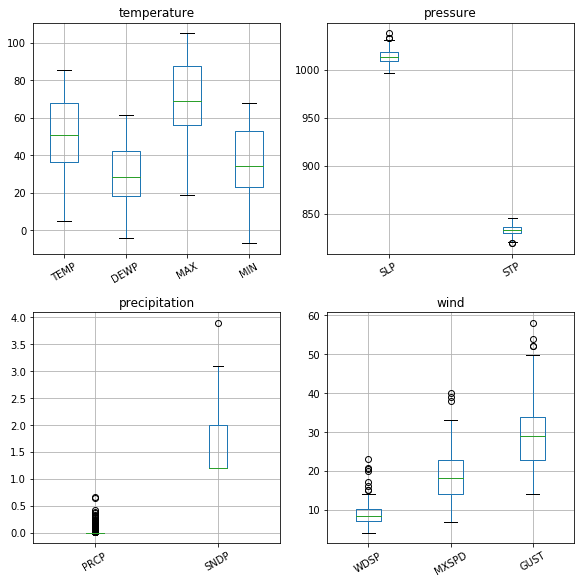

In [71]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8,8), constrained_layout=True)

ax[0,0].set_title('temperature')
df.iloc[:, [5,7,19,21]].boxplot(ax=ax[0,0])
ax[0,1].set_title('pressure')
df.iloc[:, [9,11]].boxplot(ax=ax[0,1])
ax[1,0].set_title('precipitation')
df.iloc[:, [23,25]].boxplot(ax=ax[1,0])
ax[1,1].set_title('wind')
df.iloc[:, [15,17,18]].boxplot(ax=ax[1,1])

for i in range(2):
    for j in range(2):
        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=30);

Pandas is very "time aware":

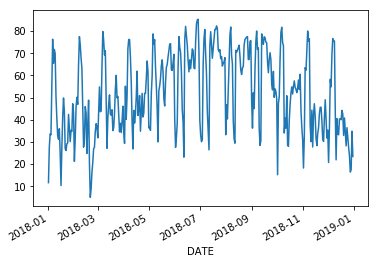

In [72]:
df.TEMP.plot()

Note: we could also manually create an axis and plot into it.

Text(0,0.5,'T (Fahrenheit)')

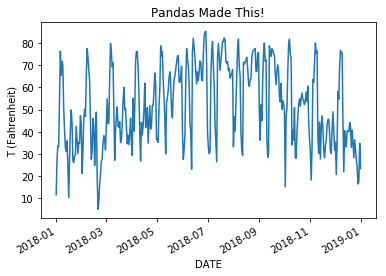

In [77]:
fig, ax = plt.subplots()
df.TEMP.plot(ax=ax)
ax.set_title('Pandas Made This!')
ax.set_ylabel('T (Fahrenheit)')

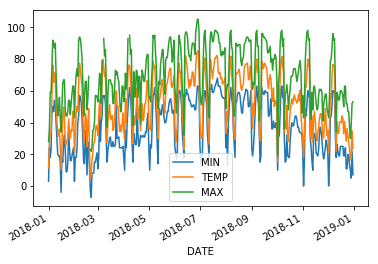

In [75]:
temps_list = ['MIN', 'TEMP', 'MAX']
df[temps_list].plot()

### Rolling operations

We easily calculate the running mean by applying a [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) window and specifying a function (in this case the `mean` function) to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

In the following example, we get the 30-day moving average temperature.

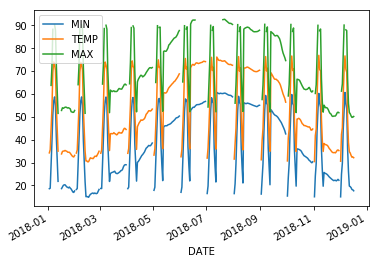

In [76]:
df[temps_list].rolling(30, center=True).mean().plot()

## <span style="color:blue">Exercises</span>
1. Convert the following dictionary into a Pandas Series and display on overview of basic statistics (count, mean, std, min,... see DataFrame subsection above). `d1 = {'a': 100, 'b': 200, 'c':300, 'd':400, 'e':800}`

2. Convert the following data into a DataFrame:
```
exam_data={'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
              'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
              'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
              'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
```
Calculate the mean score, select those whose attemps>2, and calculate how many rows are missing a score (you can use the built-in `.isnull()` function).

3. Create a a daily time series from 2015-2020 with an noisy annual cycle. Resample the data by taking the mean over each month using `resample('M')`. Create the climatology (monhtly means) using the groupby(timeseries.index.month) operator.
<img src="figures/3a3.png" width="600">

## Solutions 

In [80]:
# 1. Convert the following dictionary into a Pandas Series
# and display on overview of basic statistics
# (count, mean, std, min,... see DataFrame subsection above).
d1 = {'a': 100, 'b': 200, 'c':300, 'd':400, 'e':800}
new_series = pd.Series(d1)
print(new_series)
new_series.describe()

a    100
b    200
c    300
d    400
e    800
dtype: int64


count      5.000000
mean     360.000000
std      270.185122
min      100.000000
25%      200.000000
50%      300.000000
75%      400.000000
max      800.000000
dtype: float64

In [81]:
# 2. Convert the following data into a DataFrame:
# Calculate the mean score, select those whose attemps>2, 
# and calculate how many rows are missing a score (you can use the built-in `.isnull()` function).

exam_data={'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
           'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
           'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
           'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
exams = pd.DataFrame(exam_data)
print(f'The mean score:   {exams["score"].mean()}')

print("Number of attempts in the examination is greater than 2:")
print(exams[exams['attempts'] > 2])

print(f'This many rows are missing a score:   {len(exams[exams["score"].isnull()])}')

The mean score:   13.5625
Number of attempts in the examination is greater than 2:
      name  score  attempts qualify
1     Dima    9.0         3      no
3    James    NaN         3      no
5  Michael   20.0         3     yes
This many rows are missing a score:   2


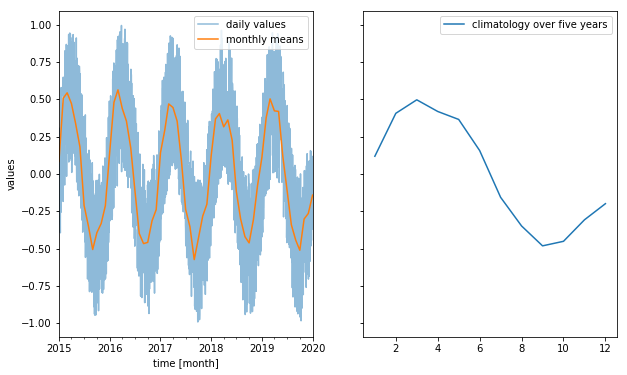

In [82]:
# 3. Create a a daily time series from 2015-2020 with an noisy annual cycle.
# Resample the data by taking the mean over each month using `resample('M')`.
# Create the climatology (monhtly means) using the groupby(timeseries.index.month) operator.

dates = pd.date_range(start='2015-01-01', end='2020-01-01', freq='D')
timeseries = pd.Series(.5*np.sin(2*np.pi*dates.dayofyear/365)+np.random.rand((len(dates)))-.5,
                       index=dates)
fig, ax = plt.subplots(1, 2, figsize=(10,6), sharey=True)

timeseries.plot(ax=ax[0], label='daily values', alpha=.5)
timeseries.resample('M').mean().plot(ax=ax[0], label='monthly means')
ax[0].legend()
ax[0].set_xlabel('time [years C.E.]')
ax[0].set_ylabel('values')

timeseries.groupby(timeseries.index.month).mean().plot(ax=ax[1], label='climatology over five years')
ax[1].legend()
ax[0].set_xlabel('time [month]')
plt.savefig('figures/3a3')